# Problem Statement

One of our customers strongly believes in technology and has recently backed up its platform using Machine Learning and Artificial Intelligence. 

Based on data collected from multiple sources on different songs and various artist attributes our customer is excited to challenge the MachineHack community.

By analyzing the chartbusters data to predict the Views of songs, MachineHackers would advance the state of the current platform. This can help our customer understand user behaviour and personalize the user experience. 

In this hackathon, we challenge the MachineHackers to come up with a prediction algorithm that can predict the views for a given song.

Can you predict how popular a song will be in the future?


### Files description:
Data_Train.csv – the training set, 78458 rows with 11 columns.

Data_Test.csv – the test set, 19615 rows with 10 columns, except the Views column.

Sample_Submission.csv – sample submission file format for reference.

Brief Descriptions of Attributes in Dataset
1.	Unique_ID : Unique Identifier.
2.	Name : Name of the Artist.
3.	Genre : Genre of the Song.
4.	Country : Origin Country of Artist.
5.	Song_Name : Name of the Song.
6.	Timestamp : Release Date and Time.
7.	Views : Number of times the song was played/viewed (*Target/Dependent Variable*).
8.	Comments : Count of comments for the song.
9.	Likes : Count of Likes.
10.	Popularity : Popularity score for the artist.
11.	Followers : Number of Followers.

# Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
train_data = pd.read_csv("../input/data-train/Data_Train.csv")
train_data.shape

(78458, 11)

In [3]:
train_data.head(5)

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030


# Removing Duplicate "Unique_ID"

In [4]:
train_data_copy = train_data.copy()

In [5]:
# Sorting by Unique_ID
train_data.sort_values("Unique_ID", inplace = True) 
  
# Making a bool series 
bool_series = train_data["Unique_ID"].duplicated(keep = False)
  
# passing NOT of bool series to see unique values only 
train_data = train_data[~bool_series]


In [6]:
train_data.shape

(78458, 11)

#### No Duplicate IDs found

# Dropping irrelevant columns

In [7]:
train_data.columns

Index(['Unique_ID', 'Name', 'Genre', 'Country', 'Song_Name', 'Timestamp',
       'Views', 'Comments', 'Likes', 'Popularity', 'Followers'],
      dtype='object')

In [8]:
# Arranging the COLUMNS and dropping 'Unique_ID', 'Name', 'Country' & 'Song_Name'
train_data = train_data[['Genre', 'Timestamp', 'Comments', 'Likes', 'Popularity', 'Followers', 'Views']]

# Label-encoding of strings

In [9]:
# applying labelecoder on Delivery_Time column
from sklearn.preprocessing import LabelEncoder
laben = LabelEncoder()

In [10]:
train_data.Genre.value_counts()

danceedm                22633
electronic              18331
all-music               10277
rbsoul                   5411
latin                    4562
trap                     4055
rock                     4000
deephouse                2423
pop                      1787
dubstep                  1100
ambient                   847
classical                 767
drumbass                  671
metal                     523
disco                     374
country                   336
alternativerock           156
hiphoprap                 100
reggaeton                  55
folksingersongwriter       39
indie                      11
Name: Genre, dtype: int64

In [12]:
train_data['Genre'] = laben.fit_transform(train_data['Genre'])

# Pre-processing of Timestamp column

#### Resetting index

In [13]:
train_data = train_data.reset_index().drop(['index'], axis=1)

#### Calculating AGE of the Song 

In [14]:
train_data['Date_of_release'] = train_data.Timestamp.str.split(" ", n = 1, expand = True)[0]

In [15]:
train_data

,Genre,Timestamp,Comments,Likes,Popularity,Followers,Views,Date_of_release
0,0,2019-02-24 21:32:16.000000,0,74,2,103,309,2019-02-24
1,0,2019-02-24 21:25:50.000000,0,27,1,103,137,2019-02-24
2,0,2019-02-24 15:32:21.000000,2,"1,055",35,103,4697,2019-02-24
3,0,2019-02-22 14:30:47.000000,0,192,23,103,1663,2019-02-22
4,0,2019-02-21 23:37:15.000000,0,11,0,103,142,2019-02-21
...,...,...,...,...,...,...,...,...
78453,0,2012-10-10 17:04:05.000000,1,31,6,5553,4679,2012-10-10
78454,0,2012-10-10 17:01:41.000000,0,48,13,5553,5663,2012-10-10
78455,0,2012-10-10 16:58:59.000000,0,34,13,5553,5291,2012-10-10
78456,0,2012-10-10 16:55:13.000000,7,552,101,5553,36029,2012-10-10


In [16]:
train_data['Date_of_release'] = pd.to_datetime(train_data['Date_of_release'])

In [17]:
train_data['Today'] = pd.to_datetime('2019-12-30')

In [18]:
train_data['No_Of_Days'] = (train_data['Today'] - train_data['Date_of_release'])

In [19]:
train_data['No_Of_Days'] = train_data['No_Of_Days'].astype(str).str.split(" ", n = 1, expand = True)[0]

# Dropping Date and Timestamp columns

In [20]:
train_data.columns

Index(['Genre', 'Timestamp', 'Comments', 'Likes', 'Popularity', 'Followers',
       'Views', 'Date_of_release', 'Today', 'No_Of_Days'],
      dtype='object')

In [21]:
train_data.drop(['Timestamp', 'Date_of_release', 'Today'], axis=1, inplace=True)

In [22]:
train_data.columns

Index(['Genre', 'Comments', 'Likes', 'Popularity', 'Followers', 'Views',
       'No_Of_Days'],
      dtype='object')

# Separating X and Y

In [23]:
x = train_data[['Genre', 'Comments', 'Likes', 'Popularity', 'Followers', 'No_Of_Days']]
y = train_data['Views']

# Data Standanrdization

In [24]:
x.describe()

,Genre,Comments,Followers
count,78458.000000,78458.000000,7.845800e+04
mean,8.750516,115.270973,4.787663e+05
std,5.955352,724.614868,1.168120e+06
min,0.000000,0.000000,1.000000e+00
25%,5.000000,1.000000,1.770000e+04
50%,9.000000,12.000000,8.768200e+04
75%,14.000000,61.000000,3.936550e+05
max,20.000000,104082.000000,9.789123e+06


# Data Transformation

In [25]:
x['Likes'] = x['Likes'].replace({",":"", "K":"", "M":""}, regex=True)
x['Likes'] = x['Likes'].astype(float)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
x['Popularity'] = x['Popularity'].replace({",":"", "K":"", "M":""}, regex=True).astype(float)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
x['No_Of_Days'] = x['No_Of_Days'].astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
y = y.astype(int)

# Plot Variables in "x"

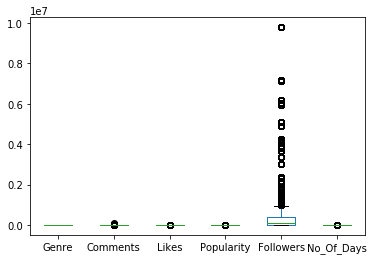

In [29]:
x[['Genre','Comments', 'Likes', 'Popularity', 'Followers', 'No_Of_Days']].plot(kind='box')

# Log Transformation of Data

In [30]:
x['Followers'] = np.log(x['Followers'])
x['Comments'] = np.log(x['Comments'])
x['Likes'] = np.log(x['Likes'])
x['Popularity'] = np.log(x['Popularity'])
x['No_Of_Days'] = np.log(x['No_Of_Days'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithC

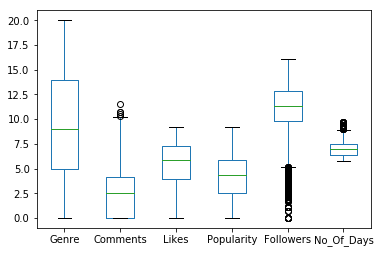

In [31]:
x[['Genre','Comments', 'Likes', 'Popularity', 'Followers', 'No_Of_Days']].plot(kind='box')

In [32]:
x[x['No_Of_Days'] == np.nan]

,Genre,Comments,Likes,Popularity,Followers,No_Of_Days


# Dealing with "INFINITY" values

In [33]:
x['Followers'] = x['Followers'].apply(lambda y: x['Followers'].median() if y == -np.inf else y)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
x['Comments'] = x['Comments'].apply(lambda y: x['Comments'].median() if y == -np.inf else y)
x['Comments'] = x['Comments'].apply(lambda y: x['Comments'].median() if y == np.nan else y)

x['Likes'] = x['Likes'].apply(lambda y: x['Likes'].median() if y == -np.inf else y)
x['Likes'] = x['Likes'].apply(lambda y: x['Likes'].median() if y == np.nan else y)

x['Popularity'] = x['Popularity'].apply(lambda y: x['Popularity'].median() if y == -np.inf else y)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

# Data Visualization

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


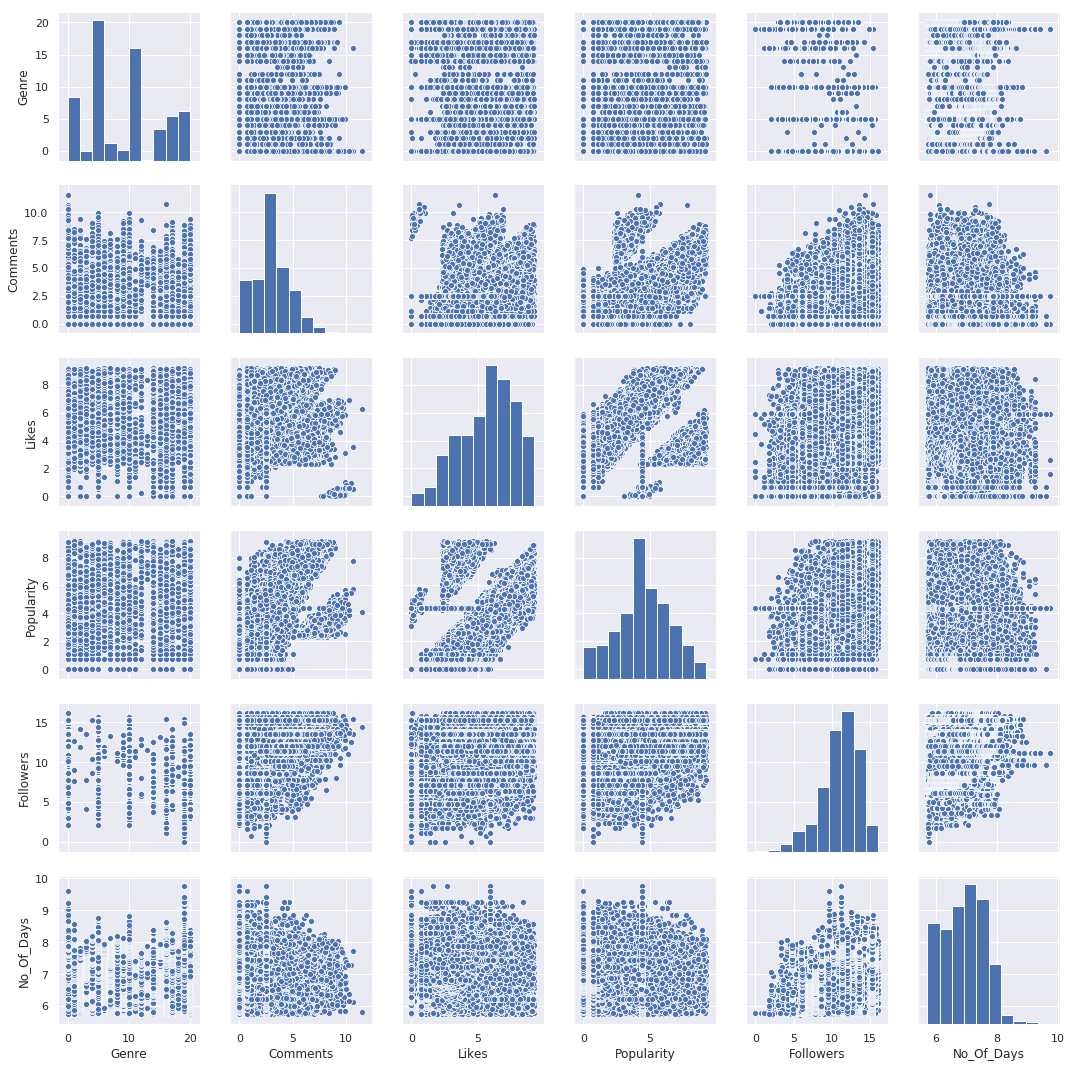

In [37]:
sns.set()
cols = ['Genre','Comments', 'Likes', 'Popularity', 'Followers', 'No_Of_Days']
sns.pairplot(x[cols], size = 2.5)
plt.show();

# Data Split

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [39]:
x.dtypes

Genre           int64
Comments      float64
Likes         float64
Popularity    float64
Followers     float64
No_Of_Days    float64
dtype: object

# Model Building

In [46]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

Using TensorFlow backend.


In [54]:
from sklearn.metrics import mean_squared_error

In [48]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 165,761
Trainable params: 165,761
Non-trainable params: 0
_________________________________________________________________


In [49]:

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [50]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 43936 samples, validate on 10984 samples
Epoch 1/500
43936/43936 [==============================] - 8s 184us/step - loss: 469356.2196 - mean_absolute_error: 469355.8750 - val_loss: 433199.1413 - val_mean_absolute_error: 433199.1875

Epoch 00001: val_loss improved from inf to 433199.14131, saving model to Weights-001--433199.14131.hdf5
Epoch 2/500
43936/43936 [==============================] - 6s 146us/step - loss: 422793.0432 - mean_absolute_error: 422792.7188 - val_loss: 395961.5419 - val_mean_absolute_error: 395961.6250

Epoch 00002: val_loss improved from 433199.14131 to 395961.54194, saving model to Weights-002--395961.54194.hdf5
Epoch 3/500
43936/43936 [==============================] - 7s 149us/step - loss: 371100.3074 - mean_absolute_error: 371100.5312 - val_loss: 348346.3017 - val_mean_absolute_error: 348346.3438

Epoch 00003: val_loss improved from 395961.54194 to 348346.30171, saving model to Weights-003--348346.30171.hdf5
Epoch 4/500
43936/43936 [===================


Epoch 00061: val_loss did not improve from 107652.59315
Epoch 62/500
43936/43936 [==============================] - 6s 147us/step - loss: 124128.4827 - mean_absolute_error: 124128.4766 - val_loss: 112859.2478 - val_mean_absolute_error: 112859.2422

Epoch 00062: val_loss did not improve from 107652.59315
Epoch 63/500
43936/43936 [==============================] - 6s 144us/step - loss: 123460.3826 - mean_absolute_error: 123460.3359 - val_loss: 132596.8698 - val_mean_absolute_error: 132596.8281

Epoch 00063: val_loss did not improve from 107652.59315
Epoch 64/500
43936/43936 [==============================] - 6s 136us/step - loss: 123184.9416 - mean_absolute_error: 123184.9766 - val_loss: 120502.7018 - val_mean_absolute_error: 120502.7266

Epoch 00064: val_loss did not improve from 107652.59315
Epoch 65/500
43936/43936 [==============================] - 6s 142us/step - loss: 120379.2766 - mean_absolute_error: 120379.3516 - val_loss: 132836.6553 - val_mean_absolute_error: 132836.6719

Epo

43936/43936 [==============================] - 6s 141us/step - loss: 108175.6273 - mean_absolute_error: 108175.5234 - val_loss: 115377.2625 - val_mean_absolute_error: 115377.2344

Epoch 00126: val_loss did not improve from 97596.38218
Epoch 127/500
43936/43936 [==============================] - 6s 138us/step - loss: 101247.0492 - mean_absolute_error: 101247.0469 - val_loss: 105814.3688 - val_mean_absolute_error: 105814.2891

Epoch 00127: val_loss did not improve from 97596.38218
Epoch 128/500
43936/43936 [==============================] - 6s 142us/step - loss: 104548.6803 - mean_absolute_error: 104548.6953 - val_loss: 103688.8662 - val_mean_absolute_error: 103688.8438

Epoch 00128: val_loss did not improve from 97596.38218
Epoch 129/500
43936/43936 [==============================] - 6s 143us/step - loss: 106737.6270 - mean_absolute_error: 106737.7031 - val_loss: 107936.5978 - val_mean_absolute_error: 107936.6094

Epoch 00129: val_loss did not improve from 97596.38218
Epoch 130/500
4393

43936/43936 [==============================] - 6s 141us/step - loss: 96045.5376 - mean_absolute_error: 96045.5391 - val_loss: 107900.0276 - val_mean_absolute_error: 107900.0469

Epoch 00191: val_loss did not improve from 90013.15686
Epoch 192/500
43936/43936 [==============================] - 7s 149us/step - loss: 95698.5668 - mean_absolute_error: 95698.5625 - val_loss: 103628.1335 - val_mean_absolute_error: 103628.1172

Epoch 00192: val_loss did not improve from 90013.15686
Epoch 193/500
43936/43936 [==============================] - 7s 149us/step - loss: 95364.4902 - mean_absolute_error: 95364.5078 - val_loss: 126365.8965 - val_mean_absolute_error: 126365.8906

Epoch 00193: val_loss did not improve from 90013.15686
Epoch 194/500
43936/43936 [==============================] - 6s 139us/step - loss: 93427.1656 - mean_absolute_error: 93427.1406 - val_loss: 108264.9302 - val_mean_absolute_error: 108264.9297

Epoch 00194: val_loss did not improve from 90013.15686
Epoch 195/500
43936/43936 

43936/43936 [==============================] - 6s 146us/step - loss: 92657.4697 - mean_absolute_error: 92657.5312 - val_loss: 100518.3251 - val_mean_absolute_error: 100518.3750

Epoch 00257: val_loss did not improve from 90013.15686
Epoch 258/500
43936/43936 [==============================] - 7s 148us/step - loss: 93436.5811 - mean_absolute_error: 93436.5078 - val_loss: 99777.9322 - val_mean_absolute_error: 99777.9609

Epoch 00258: val_loss did not improve from 90013.15686
Epoch 259/500
43936/43936 [==============================] - 6s 141us/step - loss: 92200.1948 - mean_absolute_error: 92200.2188 - val_loss: 122232.1546 - val_mean_absolute_error: 122232.1797

Epoch 00259: val_loss did not improve from 90013.15686
Epoch 260/500
43936/43936 [==============================] - 6s 146us/step - loss: 93411.1268 - mean_absolute_error: 93411.1641 - val_loss: 104582.8423 - val_mean_absolute_error: 104582.7969

Epoch 00260: val_loss did not improve from 90013.15686
Epoch 261/500
43936/43936 [=

43936/43936 [==============================] - 6s 132us/step - loss: 85607.0911 - mean_absolute_error: 85607.1172 - val_loss: 100196.0345 - val_mean_absolute_error: 100196.0703

Epoch 00323: val_loss did not improve from 90013.15686
Epoch 324/500
43936/43936 [==============================] - 6s 144us/step - loss: 86657.2028 - mean_absolute_error: 86657.2734 - val_loss: 109083.8887 - val_mean_absolute_error: 109083.8984

Epoch 00324: val_loss did not improve from 90013.15686
Epoch 325/500
43936/43936 [==============================] - 6s 138us/step - loss: 87998.3270 - mean_absolute_error: 87998.2266 - val_loss: 114989.1870 - val_mean_absolute_error: 114989.2031

Epoch 00325: val_loss did not improve from 90013.15686
Epoch 326/500
43936/43936 [==============================] - 6s 139us/step - loss: 87061.4186 - mean_absolute_error: 87061.2891 - val_loss: 96592.5696 - val_mean_absolute_error: 96592.5781

Epoch 00326: val_loss did not improve from 90013.15686
Epoch 327/500
43936/43936 [=

43936/43936 [==============================] - 6s 147us/step - loss: 83310.1378 - mean_absolute_error: 83310.1719 - val_loss: 99551.4152 - val_mean_absolute_error: 99551.4062

Epoch 00389: val_loss did not improve from 90013.15686
Epoch 390/500
43936/43936 [==============================] - 6s 135us/step - loss: 82093.9084 - mean_absolute_error: 82093.8906 - val_loss: 106065.5225 - val_mean_absolute_error: 106065.5000

Epoch 00390: val_loss did not improve from 90013.15686
Epoch 391/500
43936/43936 [==============================] - 6s 135us/step - loss: 80750.4099 - mean_absolute_error: 80750.3594 - val_loss: 111176.3577 - val_mean_absolute_error: 111176.3516

Epoch 00391: val_loss did not improve from 90013.15686
Epoch 392/500
43936/43936 [==============================] - 6s 135us/step - loss: 84549.0895 - mean_absolute_error: 84549.1016 - val_loss: 99039.1030 - val_mean_absolute_error: 99039.1016

Epoch 00392: val_loss did not improve from 90013.15686
Epoch 393/500
43936/43936 [===

43936/43936 [==============================] - 6s 139us/step - loss: 78486.1271 - mean_absolute_error: 78486.1797 - val_loss: 105633.6349 - val_mean_absolute_error: 105633.6328

Epoch 00455: val_loss did not improve from 90013.15686
Epoch 456/500
43936/43936 [==============================] - 6s 145us/step - loss: 79802.1554 - mean_absolute_error: 79802.1953 - val_loss: 98270.1471 - val_mean_absolute_error: 98270.1719

Epoch 00456: val_loss did not improve from 90013.15686
Epoch 457/500
43936/43936 [==============================] - 6s 139us/step - loss: 79236.0642 - mean_absolute_error: 79236.0391 - val_loss: 105739.3686 - val_mean_absolute_error: 105739.3750

Epoch 00457: val_loss did not improve from 90013.15686
Epoch 458/500
43936/43936 [==============================] - 6s 136us/step - loss: 78873.6255 - mean_absolute_error: 78873.6328 - val_loss: 92544.5949 - val_mean_absolute_error: 92544.5938

Epoch 00458: val_loss did not improve from 90013.15686
Epoch 459/500
43936/43936 [===

In [51]:
# Load wights file of the best model :
wights_file = 'Weights-157--90013.15686.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
X_test

In [ ]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id':pd.read_csv('test.csv').Id,'SalePrice':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

predictions = NN_model.predict(X_test)
make_submission(predictions[:,0],'submission(NN).csv')

In [52]:
Xtestset_predictions = NN_model.predict(X_test)

In [53]:
# Get the mean absolute error on the validation data
MAE = mean_absolute_error(y_test , Xtestset_predictions)
print('Model MAE = ', MAE)

Model MAE =  105290.98390383793


In [55]:
# Get the mean absolute error on the validation data
RMSE = mean_squared_error(y_test , Xtestset_predictions)
print('Model RMSE = ', RMSE)

Model MAE =  1077846069171.5579
